<a href="https://colab.research.google.com/github/carlosfmorenog/CMM202/blob/master/CMM202_Topic_6/CMM202_T6_Lab_BCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMM202 Week 8 Lab Part 2: BCR

In [ ]:
# Importing the necessary files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
# This helps that charts appear in the notebook
%matplotlib inline 

In [ ]:
# Since my Jupyter notebook uses dark theme, I use this code to make the axis labels white
from matplotlib import style
style.use('dark_background')

In [ ]:
# Import and show dataframe created during the lecture
# You can download it from moodle or use dropbox link
df = pd.read_csv('https://www.dropbox.com/s/wkvlf6hclrlrr46/city_populations_updated.csv?raw=1')
df

,City,Continent,Year,Population
0,Agra,Asia,1575,200.0
1,Agra,Asia,1576,212.0
2,Agra,Asia,1577,224.0
3,Agra,Asia,1578,236.0
4,Agra,Asia,1579,248.0
...,...,...,...,...
6247,Vijayanagar,Asia,1561,480.0
6248,Vijayanagar,Asia,1562,480.0
6249,Vijayanagar,Asia,1563,480.0
6250,Vijayanagar,Asia,1564,480.0


In [ ]:
## Create colours dictionary
colours = dict(zip(
    ['Europe', 'Asia', 'South America', 'North America', 'Africa'],
    ['#adb0ff', '#90d595','#aafbff', '#f7bb5f', '#eafb50']))
group_lk = df.set_index('City')['Continent'].to_dict()

In [ ]:
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Population', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['City'], dff['Population'], color=[colours[group_lk[x]] for x in dff['City']])
    dx = dff['Population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Population'], dff['City'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world ',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

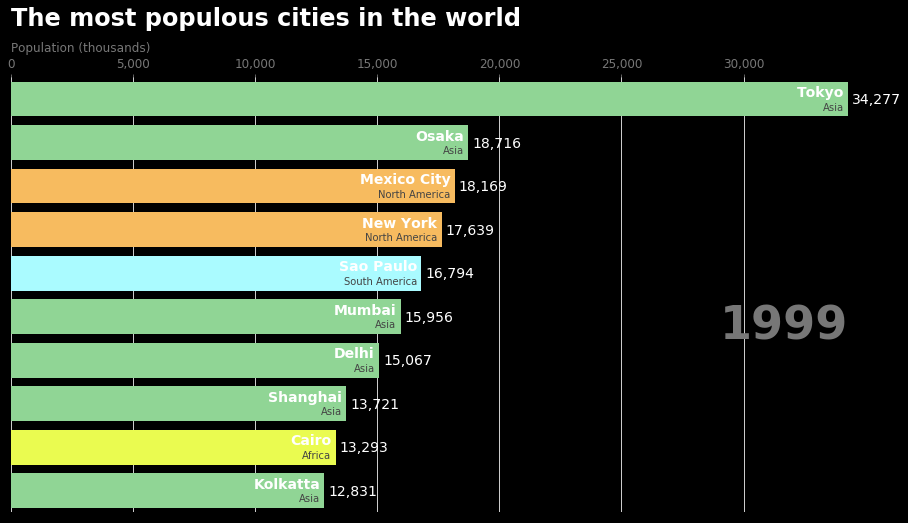

In [ ]:
# Draw barchart for a given year
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1999)

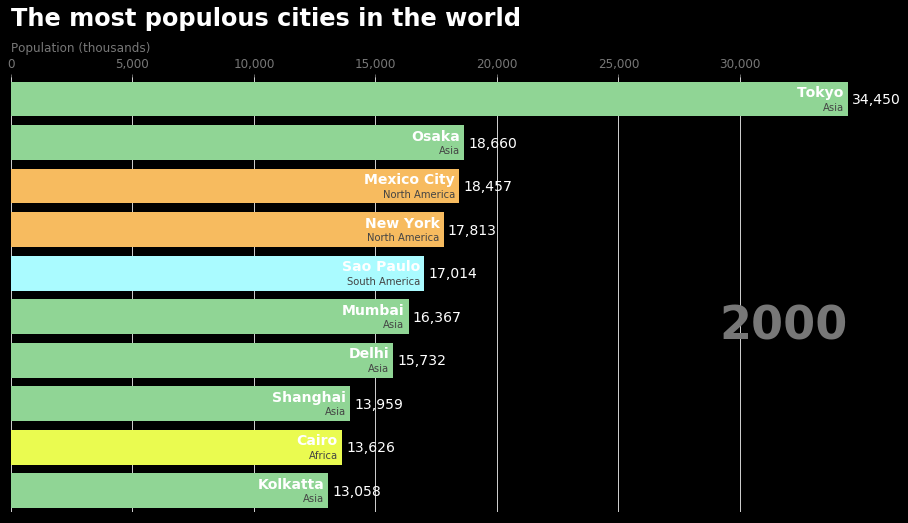

In [ ]:
# Draw the animation
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2000,2020))
HTML(animator.to_jshtml()) 